In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)
plt.style.use('ggplot')
pd.__version__

'0.23.0'

# Datums
The data set contains the top 100 baby names in the US from 1880-2008

In [2]:
babynames = pd.read_csv('data/baby-names2.csv')

In [3]:
babynames

        year      name      prop   sex soundex
0       1880      John  0.081541   boy    J500
1       1880   William  0.080511   boy    W450
2       1880     James  0.050057   boy    J520
3       1880   Charles  0.045167   boy    C642
4       1880    George  0.043292   boy    G620
5       1880     Frank  0.027380   boy    F652
6       1880    Joseph  0.022229   boy    J210
7       1880    Thomas  0.021401   boy    T520
8       1880     Henry  0.020641   boy    H560
9       1880    Robert  0.020404   boy    R163
10      1880    Edward  0.019965   boy    E363
11      1880     Harry  0.018175   boy    H600
12      1880    Walter  0.014822   boy    W436
13      1880    Arthur  0.013504   boy    A636
14      1880      Fred  0.013251   boy    F630
15      1880    Albert  0.012609   boy    A416
16      1880    Samuel  0.008648   boy    S540
17      1880     David  0.007339   boy    D130
18      1880     Louis  0.006993   boy    L200
19      1880       Joe  0.006174   boy    J000
20      1880 

In [4]:
# popular names for 1993?
babynames[babynames.year == 1993].tail()

        year     name      prop   sex soundex
242995  1993  Leilani  0.000094  girl    L450
242996  1993   Paloma  0.000094  girl    P450
242997  1993  Tanesha  0.000094  girl    T520
242998  1993    Eleni  0.000094  girl    E450
242999  1993     Hana  0.000094  girl    H500

In [6]:
# Separate the boys from the girls
boys = babynames[babynames.sex == 'boy']
girls = babynames[babynames.sex == 'girl']
girls.head()

        year       name      prop   sex soundex
129000  1880       Mary  0.072381  girl    M600
129001  1880       Anna  0.026678  girl    A500
129002  1880       Emma  0.020521  girl    E500
129003  1880  Elizabeth  0.019865  girl    E421
129004  1880     Minnie  0.017888  girl    M500

In [7]:
# num of baby boy name rows per yearr
boys.groupby('year').size()

year
1880    1000
1881    1000
1882    1000
1883    1000
1884    1000
1885    1000
1886    1000
1887    1000
1888    1000
1889    1000
1890    1000
1891    1000
1892    1000
1893    1000
1894    1000
1895    1000
1896    1000
1897    1000
1898    1000
1899    1000
1900    1000
1901    1000
1902    1000
1903    1000
1904    1000
1905    1000
1906    1000
1907    1000
1908    1000
1909    1000
        ... 
1979    1000
1980    1000
1981    1000
1982    1000
1983    1000
1984    1000
1985    1000
1986    1000
1987    1000
1988    1000
1989    1000
1990    1000
1991    1000
1992    1000
1993    1000
1994    1000
1995    1000
1996    1000
1997    1000
1998    1000
1999    1000
2000    1000
2001    1000
2002    1000
2003    1000
2004    1000
2005    1000
2006    1000
2007    1000
2008    1000
Length: 129, dtype: int64

In [8]:
babynames.groupby(['year', 'sex']).size().ix[1993]
# Get the hierarchical index of baby name rows per year 
# grouped by gender for the year

C:\Users\emyhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


sex
boy     1000
girl    1000
dtype: int64

In [10]:
# most pop boy name for 1993
rowid = boys[boys.year == 1993].prop.idxmax()
boys.ix[rowid]

C:\Users\emyhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


year          1993
name       Michael
prop       0.02401
sex            boy
soundex       M240
Name: 113000, dtype: object

In [11]:
# find the most pop name for each year 
# apply get_max_prop to the whole df

def get_max_prop(group):
    return group.ix[group.prop.idxmax()]

popularboys = boys.groupby('year').apply(get_max_prop)
popularboys.tail()

C:\Users\emyhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


      year   name      prop  sex soundex
year                                    
2004  2004  Jacob  0.013196  boy    J210
2005  2005  Jacob  0.012148  boy    J210
2006  2006  Jacob  0.011331  boy    J210
2007  2007  Jacob  0.010948  boy    J210
2008  2008  Jacob  0.010355  boy    J210

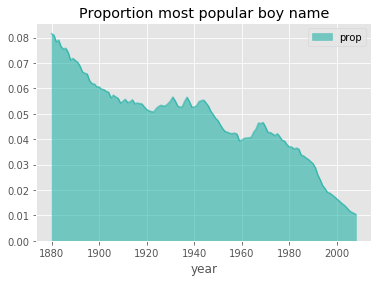

In [13]:
# Plot the proportion of the most popular boy name per year
# Maybe showing more diversity in chosen boy names over time?
popularboys.prop.plot(legend=True, title='Proportion most popular boy name', 
                          kind='area', color='#00A99D', alpha=.5)

In [14]:
# index by name/year combination 
boysindex = boys.set_index(['name', 'year'])
boysindex.head()

                  prop  sex soundex
name    year                       
John    1880  0.081541  boy    J500
William 1880  0.080511  boy    W450
James   1880  0.050057  boy    J520
Charles 1880  0.045167  boy    C642
George  1880  0.043292  boy    G620

C:\Users\emyhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


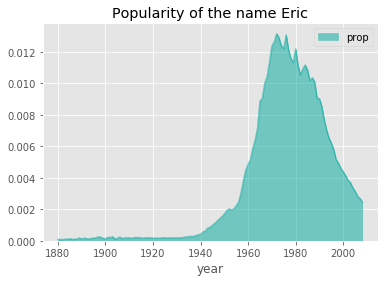

In [21]:
# Narcissistic query for the popularity of my first name
eric_popularity = boysindex.ix['Eric']
eric_popularity.prop.plot(kind='area', color='#00A99D', alpha=.5, 
                          legend=True, title='Popularity of the name Eric')

In [22]:
# Eric was most pop in the year...
boysindex.ix['Eric'].prop.idxmax()

C:\Users\emyhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


1972

In [23]:
# rad! highest boy name proportion ever....
boysindex.prop.idxmax()

('John', 1880)

In [25]:
# Calculate the mean proportion for each girl name in the set
# Show first 5 in descending order
mean_prop = girls.groupby('name')['prop'].mean()
mean_prop.head()

name
Aaliyah    0.001317
Aaron      0.000089
Abagail    0.000133
Abbey      0.000239
Abbie      0.000243
Name: prop, dtype: float64

In [28]:
result = girls.groupby('year').describe()
result.head().T

year               1880         1881         1882         1883         1884
prop count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
     mean      0.000935     0.000933     0.000931     0.000933     0.000931
     std       0.003270     0.003214     0.003211     0.003131     0.003124
     min       0.000041     0.000040     0.000043     0.000042     0.000044
     25%       0.000061     0.000061     0.000061     0.000067     0.000065
     50%       0.000123     0.000121     0.000121     0.000125     0.000128
     75%       0.000400     0.000407     0.000406     0.000433     0.000443
     max       0.072381     0.069986     0.070431     0.066737     0.066990

# Baby name diversity calculations

In [29]:
# Get a single year of girl names and sort by proportion descending
girls1993 = girls[girls.year == 1993]

In [30]:
girls1993_sorted = girls1993.sort_index(by='prop', ascending=False)

C:\Users\emyhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [31]:
girls1993_sorted.head()

        year      name      prop   sex soundex
242000  1993   Jessica  0.017753  girl    J220
242001  1993    Ashley  0.017690  girl    A240
242002  1993     Sarah  0.012289  girl    S600
242003  1993  Samantha  0.012010  girl    S553
242004  1993     Emily  0.011973  girl    E540

In [33]:
# What is the proportion of this top 1000 girl names of the total names?
girls1993_sorted.prop.cumsum().max()

0.7579480000000003

In [34]:
# Where is the 50% crossover point for cumulative sum
girls1993_cumsum = girls1993_sorted.prop.cumsum()
crossover = girls1993_cumsum.searchsorted(.5)
girls1993_cumsum[(crossover[0]-2):crossover[0]+3]

242134    0.498347
242135    0.499547
242136    0.500745
242137    0.501909
242138    0.503069
Name: prop, dtype: float64

In [35]:
# The crossover can be seen as a meassure of diversity
# It's the number of names accounting for 50% of all the names given
# So the higher, the more creative name giving
crossover[0]

136

C:\Users\emyhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


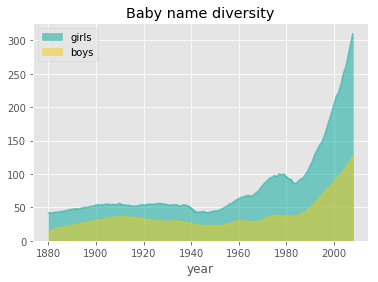

In [36]:
# Let's calculate this crossover point for boys and girls per year
def get_crossover(group, quantile):
    df = group.sort_index(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)[0]

q = .5

girls_crossover = girls.groupby('year').apply(get_crossover, quantile=q)
girls_crossover.name = 'girls'

boys_crossover = boys.groupby('year').apply(get_crossover, quantile=q)
boys_crossover.name = 'boys'

# Plot the crossover counts over time
girls_crossover.plot(kind='area', color='#00A99D', alpha=.5, legend=True)
boys_crossover.plot(title='Baby name diversity', kind='area', 
                    color='#F5CA0C', alpha=.5, legend=True)